In [11]:
import requests
import zipfile
from pathlib import Path

## Import data

First we need to import the data from a repository. For small datasets, this can be located in the same place as the code, e.g. on GitHub. For larger datasets you need to store your data on a data repository like Zenodo or use your own server, like here for example from the Broad Institute:

In [13]:
if not Path('BBBC013_v1_images_bmp').is_dir():
    url = 'https://data.broadinstitute.org/bbbc/BBBC013/BBBC013_v1_images_bmp.zip'
    response = requests.get(url, allow_redirects=True)
    with zipfile.ZipFile('BBBC013_v1_images_bmp.zip', 'r') as zip_ref:
        zip_ref.extractall('.')

## Import experimental information

In [229]:
import pandas as pd
import numpy as np

In [230]:
drugs = pd.read_csv('https://data.broadinstitute.org/bbbc/BBBC013/BBBC013_v1_platemap_all.txt')

In [231]:
len(drugs)

96

In [232]:
drug_amounts = pd.DataFrame(np.reshape(drugs.values, (8,12)))

In [233]:
drug_amounts

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.98,1.95,3.91,7.81,15.63,31.25,62.5,125.0,250.0,150.0
1,0.0,0.0,0.98,1.95,3.91,7.81,15.63,31.25,62.5,125.0,250.0,150.0
2,0.0,0.0,0.98,1.95,3.91,7.81,15.63,31.25,62.5,125.0,250.0,150.0
3,0.0,0.0,0.98,1.95,3.91,7.81,15.63,31.25,62.5,125.0,250.0,150.0
4,80.0,0.0,0.31,0.63,1.25,2.50,5.00,10.00,20.0,40.0,80.0,0.0
5,80.0,0.0,0.31,0.63,1.25,2.50,5.00,10.00,20.0,40.0,80.0,0.0
6,80.0,0.0,0.31,0.63,1.25,2.50,5.00,10.00,20.0,40.0,80.0,0.0
7,80.0,0.0,0.31,0.63,1.25,2.50,5.00,10.00,20.0,40.0,80.0,0.0


In [234]:
import string

In [235]:
[string.ascii_uppercase[i] for i in range(12)]

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']

In [236]:
drug_amounts.rename({i: i+1 for i in range(12)}, axis='columns', inplace=True)
drug_amounts.rename({i: string.ascii_uppercase[i] for i in range(12)}, axis='rows', inplace=True)

In [295]:
drug_amounts

,1,2,3,4,5,6,7,8,9,10,11,12
A,0.0,0.0,0.98,1.95,3.91,7.81,15.63,31.25,62.5,125.0,250.0,150.0
B,0.0,0.0,0.98,1.95,3.91,7.81,15.63,31.25,62.5,125.0,250.0,150.0
C,0.0,0.0,0.98,1.95,3.91,7.81,15.63,31.25,62.5,125.0,250.0,150.0
D,0.0,0.0,0.98,1.95,3.91,7.81,15.63,31.25,62.5,125.0,250.0,150.0
E,80.0,0.0,0.31,0.63,1.25,2.50,5.00,10.00,20.0,40.0,80.0,0.0
F,80.0,0.0,0.31,0.63,1.25,2.50,5.00,10.00,20.0,40.0,80.0,0.0
G,80.0,0.0,0.31,0.63,1.25,2.50,5.00,10.00,20.0,40.0,80.0,0.0
H,80.0,0.0,0.31,0.63,1.25,2.50,5.00,10.00,20.0,40.0,80.0,0.0


## Creating dataframe for conditions

In [296]:
drug_type = drug_amounts.copy()
drug_type[:] = 'Control'

drug_type.iloc[0:4,2:-1] = 'Wortmannin' 
drug_type.iloc[4:8,2:-1] = 'LY294002'

In [297]:
drug_type

,1,2,3,4,5,6,7,8,9,10,11,12
A,Control,Control,Wortmannin,Wortmannin,Wortmannin,Wortmannin,Wortmannin,Wortmannin,Wortmannin,Wortmannin,Wortmannin,Control
B,Control,Control,Wortmannin,Wortmannin,Wortmannin,Wortmannin,Wortmannin,Wortmannin,Wortmannin,Wortmannin,Wortmannin,Control
C,Control,Control,Wortmannin,Wortmannin,Wortmannin,Wortmannin,Wortmannin,Wortmannin,Wortmannin,Wortmannin,Wortmannin,Control
D,Control,Control,Wortmannin,Wortmannin,Wortmannin,Wortmannin,Wortmannin,Wortmannin,Wortmannin,Wortmannin,Wortmannin,Control
E,Control,Control,LY294002,LY294002,LY294002,LY294002,LY294002,LY294002,LY294002,LY294002,LY294002,Control
F,Control,Control,LY294002,LY294002,LY294002,LY294002,LY294002,LY294002,LY294002,LY294002,LY294002,Control
G,Control,Control,LY294002,LY294002,LY294002,LY294002,LY294002,LY294002,LY294002,LY294002,LY294002,Control
H,Control,Control,LY294002,LY294002,LY294002,LY294002,LY294002,LY294002,LY294002,LY294002,LY294002,Control


## Merge dataframes

Now we merge the two informations and turn the dataframes into a long list where each line is one well and the location defined by a row and columns indices:

In [351]:
drug_info = pd.merge(drug_amounts.stack().reset_index(), drug_type.stack().reset_index(), on=('level_0', 'level_1'))
drug_info.rename({'level_0': 'well row', 'level_1': 'well column', '0_x': 'amount', '0_y': 'drug type'}, axis=1, inplace=True)
drug_info = drug_info.set_index(['well row', 'well column'])

In [352]:
drug_info

amount   drug type
well row well column                    
A        1              0.00     Control
         2              0.00     Control
         3              0.98  Wortmannin
         4              1.95  Wortmannin
         5              3.91  Wortmannin
...                      ...         ...
H        8             10.00    LY294002
         9             20.00    LY294002
         10            40.00    LY294002
         11            80.00    LY294002
         12             0.00     Control

[96 rows x 2 columns]

## Parse files

In [353]:
data_path = Path('BBBC013_v1_images_bmp')

In [354]:
import natsort

In [355]:
file_list1 = list(data_path.glob('Channel1*.BMP'))
file_list1 = natsorted(file_list1)

file_list2 = list(data_path.glob('Channel2*.BMP'))
file_list2 = natsorted(file_list2)

## Small pipeline

In [356]:
import skimage.io
import skimage.measure
import skimage.filters
import matplotlib.pyplot as plt

image1 = skimage.io.imread(file_list1[0])
image2 = skimage.io.imread(file_list2[0])

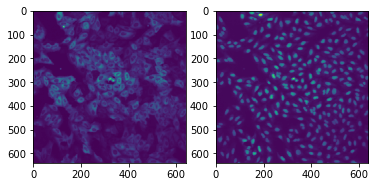

In [357]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(image1)
ax[1].imshow(image2)

In [358]:
threshold = skimage.filters.threshold_otsu(image2)
mask = image2 > threshold

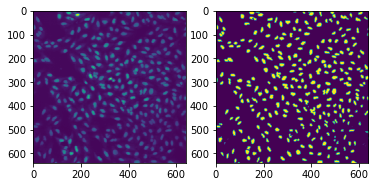

In [359]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(image2)
ax[1].imshow(mask)

In [360]:
regions = skimage.measure.regionprops_table(skimage.measure.label(mask), intensity_image=image1,
                                           properties=('label','area','mean_intensity'))

In [361]:
regions['mean_intensity'].mean()

22.00778541620419

We need to parse the well-position of the image using regular expressions:

In [362]:
file_list1[0].name

'Channel1-01-A-01.BMP'

In [363]:
import re

In [364]:
position = re.findall('.*\-.*\-(.*)\-(.*)\.BMP',file_list1[0].name)

In [365]:
[position[0][0], int(position[0][1])]

['A', 1]

We create new columns to store information

In [371]:
drug_info['area'] = np.nan
drug_info['intensity'] = np.nan
drug_info['number nuclei'] = np.nan

We can add the information to our dataframe using the parsed location as indices:

In [372]:
drug_info.loc[(position[0][0], int(position[0][1])),'area'] = regions['area'].mean()

In [373]:
drug_info

amount   drug type        area  intensity  number nuclei
well row well column                                                          
A        1              0.00     Control         NaN        NaN            NaN
         2              0.00     Control         NaN        NaN            NaN
         3              0.98  Wortmannin         NaN        NaN            NaN
         4              1.95  Wortmannin         NaN        NaN            NaN
         5              3.91  Wortmannin         NaN        NaN            NaN
...                      ...         ...         ...        ...            ...
H        8             10.00    LY294002         NaN        NaN            NaN
         9             20.00    LY294002         NaN        NaN            NaN
         10            40.00    LY294002         NaN        NaN            NaN
         11            80.00    LY294002         NaN        NaN            NaN
         12             0.00     Control  133.957529        NaN            NaN

[96 rows x 5 columns]

In [435]:
for f1, f2 in zip(file_list1, file_list2):
    
    image1 = skimage.io.imread(f1)
    image2 = skimage.io.imread(f2)

    threshold = skimage.filters.threshold_otsu(image2)
    mask = image2 > threshold
    
    regions = skimage.measure.regionprops_table(skimage.measure.label(mask), intensity_image=image1,
                                           properties=('label','area','mean_intensity'))
    
    position = re.findall('.*\-.*\-(.*)\-(.*)\.BMP',f1.name)
    
    drug_info.loc[(position[0][0], int(position[0][1])),'area'] = regions['area'].mean()
    drug_info.loc[(position[0][0], int(position[0][1])),'intensity'] = regions['mean_intensity'].mean()
    drug_info.loc[(position[0][0], int(position[0][1])),'number nuclei'] = len(regions['mean_intensity'])


In [436]:
drug_info

amount   drug type        area  intensity  number nuclei
well row well column                                                          
A        1              0.00     Control  165.987692  22.007785          325.0
         2              0.00     Control  171.313208  26.829120          265.0
         3              0.98  Wortmannin  166.097959  34.067944          245.0
         4              1.95  Wortmannin  165.542857  38.403205          210.0
         5              3.91  Wortmannin  158.549356  41.634361          233.0
...                      ...         ...         ...        ...            ...
H        8             10.00    LY294002  143.141243  70.834387          177.0
         9             20.00    LY294002  145.350649  59.930971          231.0
         10            40.00    LY294002  129.535484  72.448739          155.0
         11            80.00    LY294002  129.482759  77.204863          261.0
         12             0.00     Control  133.957529  28.122616          259.0

[96 rows x 5 columns]

## Plotting

In [437]:
import seaborn as sns

In [438]:
clean_drug = drug_info[drug_info['drug type'] != 'Control']

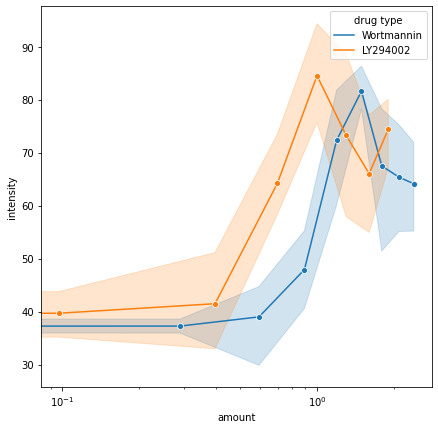

In [439]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log")
sns.lineplot(data=clean_drug, x='amount', y='intensity', hue='drug type',ax=ax, marker="o");

In [405]:
from sklearn import linear_model

In [406]:
X = clean_drug.sort_values(by='amount')['amount'].values

X = X[:, np.newaxis]

y = clean_drug.sort_values(by='amount')['intensity'].values

In [407]:
ols = linear_model.LinearRegression()
ols.fit(X, y)

LinearRegression()

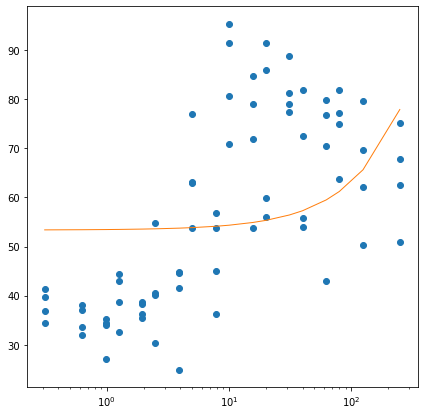

In [408]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(X,y,'o')
ax.plot(X, ols.coef_ * X + ols.intercept_, linewidth=1)
ax.set(xscale="log");


In [409]:
from scipy.optimize import curve_fit

def sigmoid (x, A, h, slope, C):
    return 1 / (1 + np.exp ((x - h) / slope)) *  A + C

p, _ = curve_fit(sigmoid, np.ravel(X), y)

In [410]:
x = np.ravel(X)

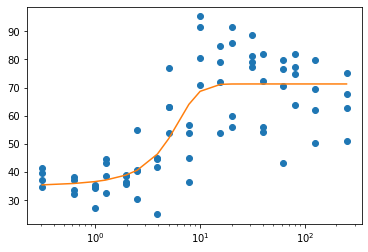

In [412]:
fig, ax = plt.subplots()
ax.set_xscale('log')
plt.plot(x, y, 'o')
plt.plot(x, sigmoid(x, *p));

In [417]:
clean_drug.reset_index()

,well row,well column,amount,drug type,area,intensity,number nuclei
0,A,3,0.98,Wortmannin,166.097959,34.067944,245.0
1,A,4,1.95,Wortmannin,165.542857,38.403205,210.0
2,A,5,3.91,Wortmannin,158.549356,41.634361,233.0
3,A,6,7.81,Wortmannin,165.786611,36.220007,239.0
4,A,7,15.63,Wortmannin,169.803828,53.868620,209.0
...,...,...,...,...,...,...,...
67,H,7,5.00,LY294002,144.555000,63.005415,200.0
68,H,8,10.00,LY294002,143.141243,70.834387,177.0
69,H,9,20.00,LY294002,145.350649,59.930971,231.0
70,H,10,40.00,LY294002,129.535484,72.448739,155.0


<AxesSubplot:xlabel='area', ylabel='Count'>

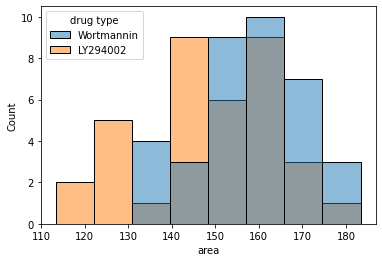

In [426]:
sns.histplot(data=clean_drug.reset_index(), x='area', hue='drug type')

## Export the data

In [440]:
drug_info.reset_index().to_csv('BBBC013_analyzed.csv', index=False)